<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000
Coefficients: [0.05548294]
Intercept: 7.007108428241848
Residual Sum of Squares (RSS): 244.04291627095853
Coefficient of Dete

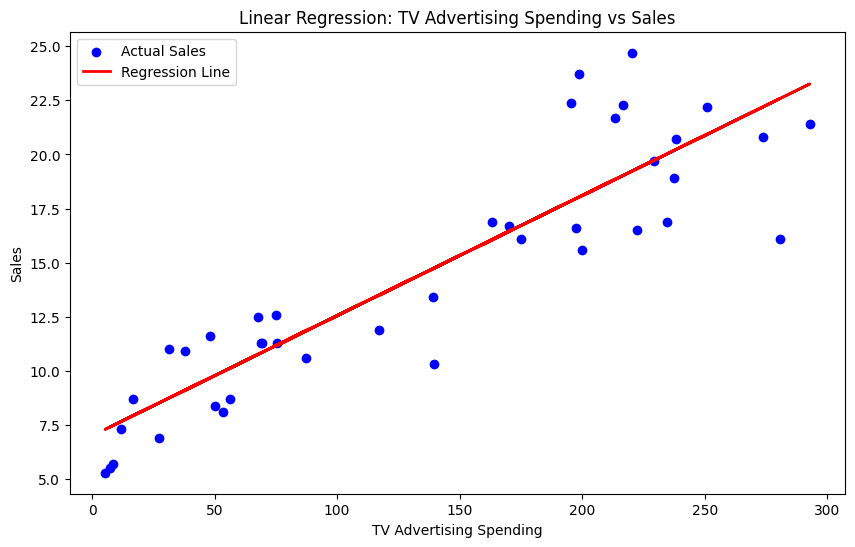

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('advertising.csv')

# Display basic info to check for categorical data or scaling needs
print(data.info())
print(data.describe())

# Assume 'TV' as the advertising spending feature and 'Sales' as the target variable
X = data[['TV']]      # Feature: TV advertising spending
y = data['Sales']     # Target: Sales

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate metrics
coefficients = model.coef_
intercept = model.intercept_
rss = np.sum((y_test - y_pred) ** 2)
r2 = r2_score(y_test, y_pred)

# Display results
print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')
print(f'Residual Sum of Squares (RSS): {rss}')
print(f'Coefficient of Determination (R^2): {r2}')

# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Sales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('TV Advertising Spending')
plt.ylabel('Sales')
plt.title('Linear Regression: TV Advertising Spending vs Sales')
plt.legend()
plt.show()
